# Tensorflow Study Notes

## Tensorflow example

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# 使用Numpy 生成假数据（phony data），总共100个点
x_data = np.float32(np.random.rand(2,100))
y_data = np.dot([0.100,0.200], x_data) + 0.300

In [3]:
#构造一个线性模型

b = tf.Variable(tf.zeros([1]))
W = tf.Variable(tf.random_uniform([1,2],-1.0,1.0))
y = tf.matmul(W, x_data) + b

In [4]:
#最小化方差

loss = tf.reduce_mean(tf.square(y-y_data))
optimzer = tf.train.GradientDescentOptimizer(0.5)
train = optimzer.minimize(loss)

In [5]:
#初始化变量

init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [6]:
#启动图

sess = tf.Session()
sess.run(init)

In [7]:
#拟合平面

for step in range(0,201):
    sess.run(train)
    if step % 20 ==0:
        print (step,sess.run(W),sess.run(b))

0 [[-0.17593452  0.32015103]] [0.84219205]
20 [[-0.0117983   0.15390609]] [0.38290125]
40 [[0.0679671  0.17892396]] [0.32801488]
60 [[0.09016443 0.19194458]] [0.30945987]
80 [[0.09684768 0.19712065]] [0.3031931]
100 [[0.0989648  0.19900088]] [0.3010776]
120 [[0.09965558 0.19965817]] [0.30036363]
140 [[0.09988463 0.19988386]] [0.30012268]
160 [[0.09996122 0.19996068]] [0.3000414]
180 [[0.09998695 0.19998671]] [0.30001396]
200 [[0.09999559 0.1999955 ]] [0.30000472]


## 尝试你的第一个 Tensorflow 程序

In [8]:
import tensorflow as tf
hello = tf.constant('Hello Tensorflow!')
sess = tf.Session()
print (sess.run(hello))

b'Hello Tensorflow!'


In [9]:
a = tf.constant(10)
b = tf.constant(32)
print (sess.run(a+b))

42


## 训练你的第一个 Tensorflow 神经网络模型

In [10]:
from tensorflow.examples.tutorials.mnist import input_data
# 载入MNIST数据集，如果指定地址/path/to/MNIST_data下没有已经下载好的数据。
# 那么Tensorflow会自动下载数据。
mnist = input_data.read_data_sets('/path/to/MNIST_data/',one_hot = True)

#打印Training data size:55000。
print ('Training data size:',mnist.train.num_examples)

#打印Validating data size:5000。
print ('Validating data size:',mnist.validation.num_examples)

#打印Testing data size：10000
print ('Testing data size:',mnist.test.num_examples)

#打印Example training data：[0. 0. 0. ... 0.380 0.376 ... 0.]
print ('Example training data:',mnist.train.images[0])

#打印Example training data label：
print ('Example training data label:',mnist.train.labels[0])

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /path/to/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /path/to/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /path/to/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /path/to/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives 

## 常见问题

使用 TensorFlow, 你必须明白 TensorFlow:

• 使用图 (graph) 来表示计算任务.

• 在被称之为会话 (Session) 的上下文 (context) 中执行图.

• 使用 tensor 表示数据.

• 通过变量 (Variable) 维护状态.

• 使用 feed 和 fetch 可以为任意的操作(arbitrary operation) 赋值或者从其中获取数据.

## 综述

TensorFlow 是一个编程系统, 使用图来表示计算任务. 图中的节点被称之为op (operation 的缩写). 一个 op
获得 0 个或多个Tensor , 执行计算, 产生 0 个或多个Tensor . 每个 Tensor 是一个类型化的多维数组. 例
如, 你可以将一小组图像集表示为一个四维浮点数数组, 这四个维度分别是[batch, height, width, channels] .

一个 TensorFlow 图描述了计算的过程. 为了进行计算, 图必须在会话里被启动. 会话将图的 op 分发到
诸如 CPU 或 GPU 之类的设备上, 同时提供执行 op 的方法. 这些方法执行后, 将产生的 tensor 返回. 在 P
ython 语言中, 返回的 tensor 是numpy ndarray 对象; 在 C 和 C++ 语言中, 返回的 tensor 是tensorflo
w::Tensor 实例.

## 计算图

TensorFlow 程序通常被组织成一个构建阶段和一个执行阶段. 在构建阶段, op 的执行步骤 被描述成一个图. 在
执行阶段, 使用会话执行执行图中的 op.

例如, 通常在构建阶段创建一个图来表示和训练神经网络, 然后在执行阶段反复执行图中的训练 op.

TensorFlow 支持 C, C++, Python 编程语言. 目前, TensorFlow 的 Python 库更加易用, 它提供了大量的辅助
函数来简化构建图的工作, 这些函数尚未被 C 和 C++ 库支持.

三种语言的会话库 (session libraries) 是一致的.

### 构建图

构建图的第一步, 是创建源 op (source op). 源 op 不需要任何输入, 例如常量 (Constant) . 源 op 的输出
被传递给其它 op 做运算.

Python 库中, op 构造器的返回值代表被构造出的 op 的输出, 这些返回值可以传递给其它 op 构造器作为输入.

TensorFlow Python 库有一个默认图 (default graph), op 构造器可以为其增加节点. 这个默认图对 许多程序
来说已经足够用了. 阅读Graph 类文档 来了解如何管理多个图.

In [11]:
import tensorflow as tf

In [12]:
# 创建一个常量 op, 产生一个 1x2 矩阵. 这个 op 被作为一个节点
# 加到默认图中.
#
# 构造器的返回值代表该常量 op 的返回值.

matrix1 = tf.constant([[3.,3.]])

In [13]:
# 创建另外一个常量op，产生一个2x1矩阵。

matrix2 = tf.constant([[2.],[2.]])

In [14]:
# 创建一个矩阵乘法 matmul op ， 把 'matrix1' 和 'matrix2' 作为输入。
# 返回值 ‘product’代表矩阵乘法的结果。

product = tf.matmul(matrix1,matrix2)

默认图现在有三个节点, 两个constant() op, 和一个matmul() op. 为了真正进行矩阵相乘运算, 并得到矩阵
乘法的 结果, 你必须在会话里启动这个图.

### 在一个会话中启动图


构造阶段完成后, 才能启动图. 启动图的第一步是创建一个Session 对象, 如果无任何创建参数, 会话构造器
将启动默认图.

欲了解完整的会话 API, 请阅读Session 类.

In [15]:
# 启动默认图

sess = tf.Session()

#调用sess的‘run（）’方法来执行矩阵乘法op，传入‘product’作为该方法的参数。
#上面提到，‘product’代表矩阵乘法op的输出，传入它是向方法表明，我们希望取回
#矩阵乘法op的输出。
#
#整个执行过程是自动化的，会话负责传递op所需的全部输入。op通常是并发执行的。
#
#函数调用‘run（product）’触发了图中三个op（两个常量op和一个乘法op）的执行。
#
#返回值‘result’是一个numpy ‘ndarray’对象。

result = sess.run(product)
print (result)
#==>[[12.]]

#任务完成，关闭会话。

sess.close()



[[12.]]


Session 对象在使用完后需要关闭以释放资源. 除了显式调用 close 外, 也可以使用 "with" 代码块 来自动完
成关闭动作.

In [16]:
with tf.Session() as sess:
    result = sess.run([product])
    print (result)

[array([[12.]], dtype=float32)]


在实现上, TensorFlow 将图形定义转换成分布式执行的操作, 以充分利用可用的计算资源(如 CPU 或 GPU). 一
般你不需要显式指定使用 CPU 还是 GPU, TensorFlow 能自动检测. 如果检测到 GPU, TensorFlow 会尽可能地利
用找到的第一个 GPU 来执行操作.

如果机器上有超过一个可用的 GPU, 除第一个外的其它 GPU 默认是不参与计算的. 为了让 TensorFlow 使用这些
GPU, 你必须将 op 明确指派给它们执行. with...Device 语句用来指派特定的 CPU 或 GPU 执行操作:

In [17]:
with tf.Session() as sess:
    with tf.device("/cpu:0"):
        matrix1 = tf.constant([[3., 3.]])
        matrix2 = tf.constant([[2.],[2.]])
        product = tf.matmul(matrix1, matrix2)
        print (sess.run(product))

[[12.]]


设备用字符串进行标识. 目前支持的设备包括:
    
• "/cpu:0" : 机器的 CPU.
    
• "/gpu:0" : 机器的第一个 GPU, 如果有的话.
    
• "/gpu:1" : 机器的第二个 GPU, 以此类推.
    
阅读使用GPU章节, 了解 TensorFlow GPU 使用的更多信息.

## 交互式使用

文档中的 Python 示例使用一个会话Session 来 启动图, 并调用Session.run() 方法执行操作.

为了便于使用诸如IPython 之类的 Python 交互环境, 可以使用InteractiveSession 代替Session 类, 使用
Tensor.eval() 和Operation.run() 方法代替Session.run() . 这样可以避免使用一个变量来持有会话.

In [18]:
# 进入一个交互式 Tensorflow 会话


import tensorflow as tf
sess = tf.InteractiveSession()


x = tf.Variable([1.0, 2.0])
a = tf.constant([3.0, 3.0])

#使用初始化器initializer op的run（）方法初始化‘x’

x.initializer.run()

#增加一个减法 sub op，从 ‘x’减去‘a’。运行减法op，输出结果

sub = tf.subtract(x, a)
print (sub.eval())
#==>[-2. -1.]

[-2. -1.]


## Tensor

TensorFlow 程序使用 tensor 数据结构来代表所有的数据, 计算图中, 操作间传递的数据都是 tensor. 你可以
把 TensorFlow tensor 看作是一个 n 维的数组或列表. 一个 tensor 包含一个静态类型 rank, 和 一个 shape.
想了解 TensorFlow 是如何处理这些概念的, 参见Rank, Shape, 和 Type.

## 变量

Variables for more details. 变量维护图执行过程中的状态信息. 下面的例子演示了如何使用变量实现一个简
单的计数器. 参见变量章节了解更多细节.

In [19]:
# 创建一个变量，初始化为标量0.

state = tf.Variable(0,name = 'counter')

# 创建一个op，其作用是使state增加1


one = tf.constant(1)
new_value = tf.add(state,one)
update = tf.assign(state,new_value)

#启动图后，变量必须先经过‘初始化’（init）op初始化，
#首先必须增加一个‘初始化’op到图中。

init_op = tf.initialize_all_variables()

#启动图，运行op

with tf.Session() as sess:
    #运行‘init’op
    sess.run(init_op)
    #打印‘state’的初始值
    print (sess.run(state))
    #运行op，更新‘state’，并打印‘state’
    for _ in range(3):
        sess.run(update)
        print (sess.run(state))
        
# 输出：

#0

#1

#2

#3      

0
1
2
3


代码中assign() 操作是图所描绘的表达式的一部分, 正如add() 操作一样. 所以在调用run() 执行表达式
之前, 它并不会真正执行赋值操作.

通常会将一个统计模型中的参数表示为一组变量. 例如, 你可以将一个神经网络的权重作为某个变量存储在一个
tensor 中. 在训练过程中, 通过重复运行训练图, 更新这个 tensor.

## Fetch

为了取回操作的输出内容, 可以在使用Session 对象的run() 调用 执行图时, 传入一些 tensor, 这些 tens
or 会帮助你取回结果. 在之前的例子里, 我们只取回了单个节点state , 但是你也可以取回多个 tensor:

In [20]:
input1 = tf.constant(3.0)
input2 = tf.constant(2.0)
input3 = tf.constant(5.0)
intermed = tf.add(input2,input3)
mul = tf.multiply(input1,intermed)

with tf.Session() as sess:
    result = sess.run([mul,intermed])
    print (result)
    
#输出：

#[array([21.],dtype=float32),array([7.],dtype=float32)]

[21.0, 7.0]


需要获取的多个 tensor 值，在 op 的一次运行中一起获得（而不是逐个去获取 tensor）。

## Feed

上述示例在计算图中引入了 tensor, 以常量或变量的形式存储. TensorFlow 还提供了 feed 机制, 该机制 可以
临时替代图中的任意操作中的 tensor 可以对图中任何操作提交补丁, 直接插入一个 tensor.

feed 使用一个 tensor 值临时替换一个操作的输出结果. 你可以提供 feed 数据作为run() 调用的参数. feed
只在调用它的方法内有效, 方法结束, feed 就会消失. 最常见的用例是将某些特殊的操作指定为 "feed" 操作,
标记的方法是使用 tf.placeholder() 为这些操作创建占位符.

In [25]:
input1 = tf.placeholder(dtype=float)
input2 = tf.placeholder(dtype=float)
output = tf.multiply(input1,input2)

with tf.Session() as sess:
    print(sess.run([output],feed_dict={input1:[7.],input2:[2.]}))
    
#输出

#[array([14.],dtype =float32)]

[array([14.], dtype=float32)]


for a larger-scale example of feeds. 如果没有正确提供 feed, placeholder() 操作将会产生错误. MNIST
全连通feed 教程(source code) 给出了一个更大规模的使用 feed 的例子.

# MNIST机器学习入门

这个教程的目标读者是对机器学习和TensorFlow都不太了解的新手。如果你已经了解MNIST和softmax回归(softma
x regression)的相关知识，你可以阅读这个快速上手教程。

当我们开始学习编程的时候，第一件事往往是学习打印"Hello World"。就好比编程入门有Hello World，机器学
习入门有MNIST。

MNIST是一个入门级的计算机视觉数据集，它包含各种手写数字图片：
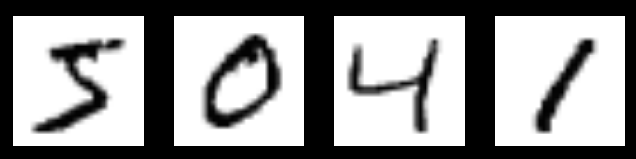

它也包含每一张图片对应的标签，告诉我们这个是数字几。比如，上面这四张图片的标签分别是5，0，4，1。

在此教程中，我们将训练一个机器学习模型用于预测图片里面的数字。我们的目的不是要设计一个世界一流的复
杂模型 -- 尽管我们会在之后给你源代码去实现一流的预测模型 -- 而是要介绍下如何使用TensorFlow。所
以，我们这里会从一个很简单的数学模型开始，它叫做Softmax Regression。

对应这个教程的实现代码很短，而且真正有意思的内容只包含在三行代码里面。但是，去理解包含在这些代码里
面的设计思想是非常重要的：TensorFlow工作流程和机器学习的基本概念。因此，这个教程会很详细地介绍这些
代码的实现原理。

## MNIST数据集

MNIST数据集的官网是Yann LeCun's website。在这里，我们提供了一份python源代码用于自动下载和安装这个数
据集。你可以下载这份代码，然后用下面的代码导入到你的项目里面，也可以直接复制粘贴到你的代码文件里
面。

In [29]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/',one_hot = True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


下载下来的数据集被分成两部分：60000行的训练数据集（ mnist.train ）和10000行的测试数据集（ mnist.tes
t ）。这样的切分很重要，在机器学习模型设计时必须有一个单独的测试数据集不用于训练而是用来评估这个模
型的性能，从而更加容易把设计的模型推广到其他数据集上（泛化）。

正如前面提到的一样，每一个MNIST数据单元有两部分组成：一张包含手写数字的图片和一个对应的标签。我们把
这些图片设为“xs”，把这些标签设为“ys”。训练数据集和测试数据集都包含xs和ys，比如训练数据集的图片
是mnist.train.images ，训练数据集的标签是mnist.train.labels 。

每一张图片包含28X28个像素点。我们可以用一个数字数组来表示这张图片：

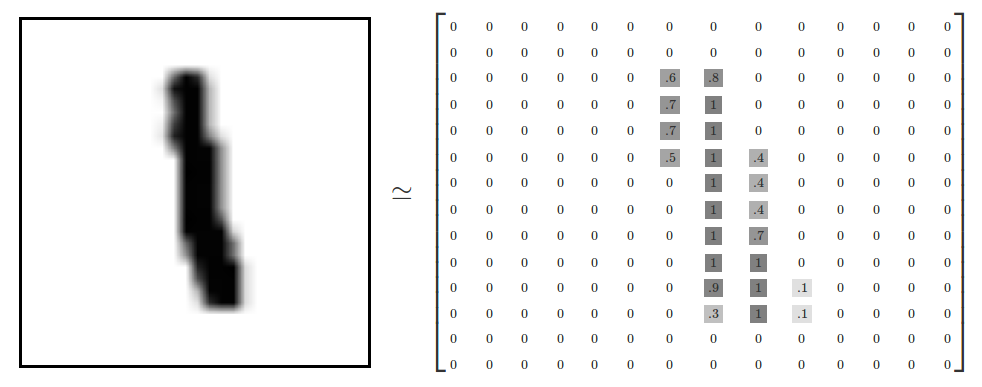

我们把这个数组展开成一个向量，长度是 28x28 = 784。如何展开这个数组（数字间的顺序）不重要，只要保持
各个图片采用相同的方式展开。从这个角度来看，MNIST数据集的图片就是在784维向量空间里面的点, 并且拥有
比较复杂的结构(提醒: 此类数据的可视化是计算密集型的)。

展平图片的数字数组会丢失图片的二维结构信息。这显然是不理想的，最优秀的计算机视觉方法会挖掘并利用这
些结构信息，我们会在后续教程中介绍。但是在这个教程中我们忽略这些结构，所介绍的简单数学模型，softmax
回归(softmax regression)，不会利用这些结构信息。

因此，在MNIST训练数据集中， mnist.train.images 是一个形状为[60000, 784] 的张量，第一个维度数字用来
索引图片，第二个维度数字用来索引每张图片中的像素点。在此张量里的每一个元素，都表示某张图片里的某个
像素的强度值，值介于0和1之间。

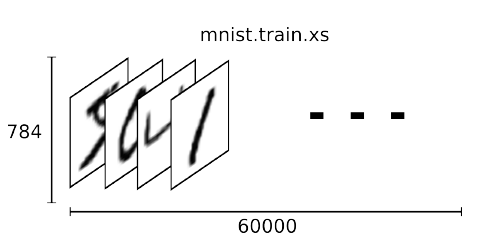

相对应的MNIST数据集的标签是介于0到9的数字，用来描述给定图片里表示的数字。为了用于这个教程，我们使标
签数据是"one-hot vectors"。 一个one-hot向量除了某一位的数字是1以外其余各维度数字都是0。所以在此教程
中，数字n将表示成一个只有在第n维度（从0开始）数字为1的10维向量。比如，标签0将表示
成([1,0,0,0,0,0,0,0,0,0,0])。因此， mnist.train.labels 是一个[60000, 10] 的数字矩阵。

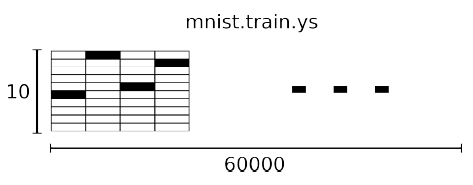

现在，我们准备好可以开始构建我们的模型啦！

## Softmax回归介绍

我们知道MNIST的每一张图片都表示一个数字，从0到9。我们希望得到给定图片代表每个数字的概率。比如说，我
们的模型可能推测一张包含9的图片代表数字9的概率是80%但是判断它是8的概率是5%（因为8和9都有上半部分的
小圆），然后给予它代表其他数字的概率更小的值。

这是一个使用softmax回归（softmax regression）模型的经典案例。softmax模型可以用来给不同的对象分配概
率。即使在之后，我们训练更加精细的模型时，最后一步也需要用softmax来分配概率。
softmax回归（softmax regression）分两步：第一步

为了得到一张给定图片属于某个特定数字类的证据（evidence），我们对图片像素值进行加权求和。如果这个像
素具有很强的证据说明这张图片不属于该类，那么相应的权值为负数，相反如果这个像素拥有有利的证据支持这
张图片属于这个类，那么权值是正数。

下面的图片显示了一个模型学习到的图片上每个像素对于特定数字类的权值。红色代表负数权值，蓝色代表正数
权值。

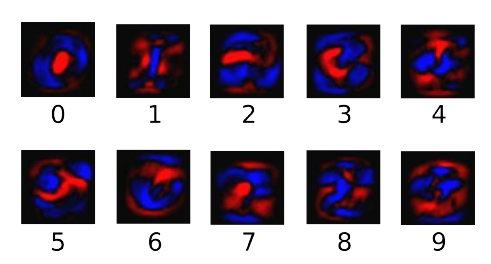

我们也需要加入一个额外的偏置量（bias），因为输入往往会带有一些无关的干扰量。因此对于给定的输入图片
x 它代表的是数字i 的证据可以表示为

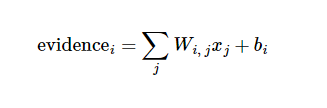

其中代表数字i 类的偏置量，j 代表给定图片x 的像素索引用于像素求和。然后用softmax函数可以把这些证据转换
成概率y：


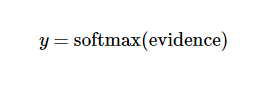

这里的softmax可以看成是一个激励（activation）函数或者链接（link）函数，把我们定义的线性函数的输出转
换成我们想要的格式，也就是关于10个数字类的概率分布。因此，给定一张图片，它对于每一个数字的吻合度可
以被softmax函数转换成为一个概率值。softmax函数可以定义为：

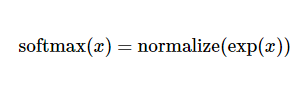

展开等式右边的子式，可以得到：

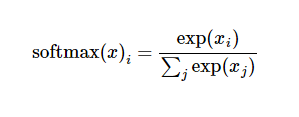

但是更多的时候把softmax模型函数定义为前一种形式：把输入值当成幂指数求值，再正则化这些结果值。这个幂
运算表示，更大的证据对应更大的假设模型（hypothesis）里面的乘数权重值。反之，拥有更少的证据意味着在
假设模型里面拥有更小的乘数系数。假设模型里的权值不可以是0值或者负值。Softmax然后会正则化这些权重
值，使它们的总和等于1，以此构造一个有效的概率分布。（更多的关于Softmax函数的信息，可以参考Michael N
ieslen的书里面的这个部分，其中有关于softmax的可交互式的可视化解释。）

对于softmax回归模型可以用下面的图解释，对于输入的xs 加权求和，再分别加上一个偏置量，最后再输入到sof
tmax函数中：

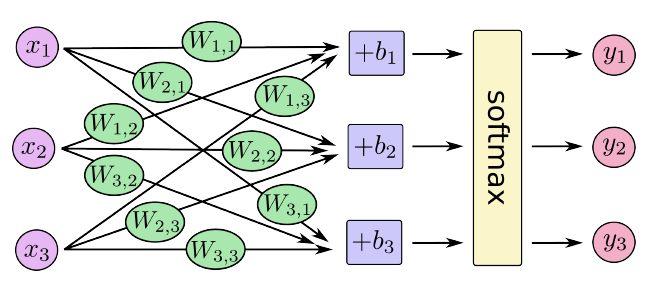

如果把它写成一个等式，我们可以得到：

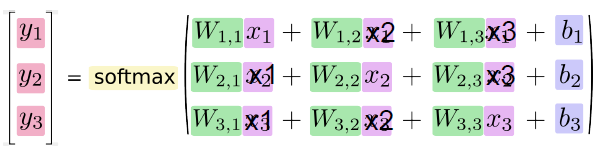


我们也可以用向量表示这个计算过程：用矩阵乘法和向量相加。这有助于提高计算效率。（也是一种更有效的思
考方式）

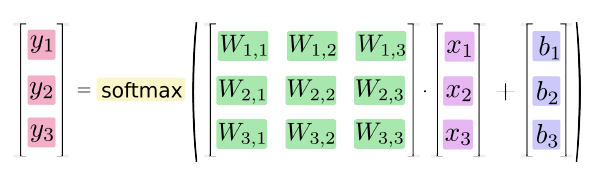

更进一步，可以写成更加紧凑的方式：

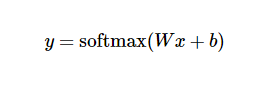

## 实现回归模型

为了用python实现高效的数值计算，我们通常会使用函数库，比如NumPy，会把类似矩阵乘法这样的复杂运算使用
其他外部语言实现。不幸的是，从外部计算切换回Python的每一个操作，仍然是一个很大的开销。如果你用GPU来
进行外部计算，这样的开销会更大。用分布式的计算方式，也会花费更多的资源用来传输数据。


TensorFlow也把复杂的计算放在python之外完成，但是为了避免前面说的那些开销，它做了进一步完善。Tensorf
low不单独地运行单一的复杂计算，而是让我们可以先用图描述一系列可交互的计算操作，然后全部一起在Python
之外运行。（这样类似的运行方式，可以在不少的机器学习库中看到。）

使用TensorFlow之前，首先导入它：

In [30]:
import tensorflow as tf

我们通过操作符号变量来描述这些可交互的操作单元，可以用下面的方式创建一个：

In [78]:
x = tf.placeholder(tf.float32,[None,784])

x 不是一个特定的值，而是一个占位符placeholder ，我们在TensorFlow运行计算时输入这个值。我们希望能够
输入任意数量的MNIST图像，每一张图展平成784维的向量。我们用2维的浮点数张量来表示这些图，这个张量的形
状是[None，784 ] 。（这里的None 表示此张量的第一个维度可以是任何长度的。）

我们的模型也需要权重值和偏置量，当然我们可以把它们当做是另外的输入（使用占位符），但TensorFlow有一
个更好的方法来表示它们： Variable 。 一个Variable 代表一个可修改的张量，存在在TensorFlow的用于描述
交互性操作的图中。它们可以用于计算输入值，也可以在计算中被修改。对于各种机器学习应用，一般都会有模
型参数，可以用Variable 表示。

In [79]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

我们赋予tf.Variable 不同的初值来创建不同的Variable ：在这里，我们都用全为零的张量来初始化W 和
b 。因为我们要学习W 和b 的值，它们的初值可以随意设置。

注意， W 的维度是[784，10]，因为我们想要用784维的图片向量乘以它以得到一个10维的证据值向量，每一位对
应不同数字类。b 的形状是[10]，所以我们可以直接把它加到输出上面。

现在，我们可以实现我们的模型啦。只需要一行代码！

In [80]:
y = tf.nn.softmax(tf.matmul(x,W) + b)

首先，我们用tf.matmul(X，W) 表示x 乘以W ，对应之前等式里面的



，这里x 是一个2维张量拥有多个输入。然后再加上b ，把和输入到tf.nn.softmax 函数里面。
至此，我们先用了几行简短的代码来设置变量，然后只用了一行代码来定义我们的模型。TensorFlow不仅仅可以
使softmax回归模型计算变得特别简单，它也用这种非常灵活的方式来描述其他各种数值计算，从机器学习模型对
物理学模拟仿真模型。一旦被定义好之后，我们的模型就可以在不同的设备上运行：计算机的CPU，GPU，甚至是
手机！

## 训练模型

为了训练我们的模型，我们首先需要定义一个指标来评估这个模型是好的。其实，在机器学习，我们通常定义指
标来表示一个模型是坏的，这个指标称为成本（cost）或损失（loss），然后尽量最小化这个指标。但是，这两
种方式是相同的。

一个非常常见的，非常漂亮的成本函数是“交叉熵”（cross-entropy）。交叉熵产生于信息论里面的信息压缩编
码技术，但是它后来演变成为从博弈论到机器学习等其他领域里的重要技术手段。它的定义如下：

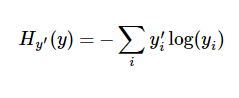

y 是我们预测的概率分布, y' 是实际的分布（我们输入的one-hot vector)。比较粗糙的理解是，交叉熵是用来
衡量我们的预测用于描述真相的低效性。更详细的关于交叉熵的解释超出本教程的范畴，但是你很有必要好好理
解它。

为了计算交叉熵，我们首先需要添加一个新的占位符用于输入正确值：

In [81]:
y_ = tf.placeholder(tf.float32,[None,10])

然后我们可以用

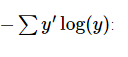

计算交叉熵:

In [82]:
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))

首先，用tf.log 计算y 的每个元素的对数。接下来，我们把y_ 的每一个元素和tf.log(y) 的对应元素
相乘。最后，用tf.reduce_sum 计算张量的所有元素的总和。（注意，这里的交叉熵不仅仅用来衡量单一的一
对预测和真实值，而是所有100幅图片的交叉熵的总和。对于100个数据点的预测表现比单一数据点的表现能更好
地描述我们的模型的性能。

现在我们知道我们需要我们的模型做什么啦，用TensorFlow来训练它是非常容易的。因为TensorFlow拥有一张描
述你各个计算单元的图，它可以自动地使用反向传播算法(backpropagation algorithm)来有效地确定你的变量是
如何影响你想要最小化的那个成本值的。然后，TensorFlow会用你选择的优化算法来不断地修改变量以降低成
本。

In [83]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

在这里，我们要求TensorFlow用梯度下降算法（gradient descent algorithm）以0.01的学习速率最小化交叉
熵。梯度下降算法（gradient descent algorithm）是一个简单的学习过程，TensorFlow只需将每个变量一点点
地往使成本不断降低的方向移动。当然TensorFlow也提供了其他许多优化算法：只要简单地调整一行代码就可以
使用其他的算法。

TensorFlow在这里实际上所做的是，它会在后台给描述你的计算的那张图里面增加一系列新的计算操作单元用于
实现反向传播算法和梯度下降算法。然后，它返回给你的只是一个单一的操作，当运行这个操作时，它用梯度下
降算法训练你的模型，微调你的变量，不断减少成本。

现在，我们已经设置好了我们的模型。在运行计算之前，我们需要添加一个操作来初始化我们创建的变量：

In [84]:
init = tf.initialize_all_variables()

现在我们可以在一个Session 里面启动我们的模型，并且初始化变量：

In [87]:
sess = tf.Session()
sess.run(init)

然后开始训练模型，这里我们让模型循环训练1000次！

In [86]:
sess.close()

In [91]:
for i in range(1000):
    batch_xs,batch_ys = mnist.train.next_batch(100)
    #print ( batch_xs.shape,batch_ys.dtype)
    sess.run(train_step, feed_dict={x:batch_xs,y_:batch_ys})

该循环的每个步骤中，我们都会随机抓取训练数据中的100个批处理数据点，然后我们用这些数据点作为参数替换
之前的占位符来运行train_step 。

使用一小部分的随机数据来进行训练被称为随机训练（stochastic training）- 在这里更确切的说是随机梯度下
降训练。在理想情况下，我们希望用我们所有的数据来进行每一步的训练，因为这能给我们更好的训练结果，但
显然这需要很大的计算开销。所以，每一次训练我们可以使用不同的数据子集，这样做既可以减少计算开销，又
可以最大化地学习到数据集的总体特性。

## 评估我们的模型

那么我们的模型性能如何呢？

首先让我们找出那些预测正确的标签。tf.argmax 是一个非常有用的函数，它能给出某个tensor对象在某一维上
的其数据最大值所在的索引值。由于标签向量是由0,1组成，因此最大值1所在的索引位置就是类别标签，比如t
f.argmax(y,1) 返回的是模型对于任一输入x预测到的标签值，而tf.argmax(y_,1) 代表正确的标签，我们可以
用tf.equal 来检测我们的预测是否真实标签匹配(索引位置一样表示匹配)。

In [93]:
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))

这行代码会给我们一组布尔值。为了确定正确预测项的比例，我们可以把布尔值转换成浮点数，然后取平均
值。例如， [True, False, True, True] 会变成[1,0,1,1] ，取平均值后得到0.75 .

In [95]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

最后，我们计算所学习到的模型在测试数据集上面的正确率。

In [96]:
print (sess.run(accuracy, feed_dict= {x: mnist.test.images, y_: mnist.test.labels}))

0.9188


这个最终结果值应该大约是91%。

这个结果好吗？嗯，并不太好。事实上，这个结果是很差的。这是因为我们仅仅使用了一个非常简单的模型。不
过，做一些小小的改进，我们就可以得到97％的正确率。最好的模型甚至可以获得超过99.7％的准确率！（想了
解更多信息，可以看看这个关于各种模型的性能对比列表。)

比结果更重要的是，我们从这个模型中学习到的设计思想。不过，如果你仍然对这里的结果有点失望，可以查看
下一个教程，在那里你可以学习如何用TensorFlow构建更加复杂的模型以获得更好的性能！

# 深入MNIST

TensorFlow是一个非常强大的用来做大规模数值计算的库。其所擅长的任务之一就是实现以及训练深度神经网络。

在本教程中，我们将学到构建一个TensorFlow模型的基本步骤，并将通过这些步骤为MNIST构建一个深度卷积神经
网络。

这个教程假设你已经熟悉神经网络和MNIST数据集。如果你尚未了解，请查看新手指南.

## 安装

在创建模型之前，我们会先加载MNIST数据集，然后启动一个TensorFlow的session。


### 加载MNIST数据


为了方便起见，我们已经准备了一个脚本来自动下载和导入MNIST数据集。它会自动创建一个'MNIST_data' 的目
录来存储数据。

In [97]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


这里， mnist 是一个轻量级的类。它以Numpy数组的形式存储着训练、校验和测试数据集。同时提供了一个函
数，用于在迭代中获得minibatch，后面我们将会用到。

### 运行TensorFlow的InteractiveSession

Tensorflow依赖于一个高效的C++后端来进行计算。与后端的这个连接叫做session。一般而言，使用TensorFlow
程序的流程是先创建一个图，然后在session中启动它。

这里，我们使用更加方便的InteractiveSession 类。通过它，你可以更加灵活地构建你的代码。它能让你在运行
图的时候，插入一些计算图，这些计算图是由某些操作(operations)构成的。这对于工作在交互式环境中的人们
来说非常便利，比如使用IPython。如果你没有使用InteractiveSession ，那么你需要在启动session之前构建整
个计算图，然后启动该计算图。

In [99]:
import tensorflow as tf
sess = tf.InteractiveSession()

D:\Anaconda2\envs\python3\lib\site-packages\tensorflow\python\client\session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


### 计算图

为了在Python中进行高效的数值计算，我们通常会使用像NumPy一类的库，将一些诸如矩阵乘法的耗时操作在Pyth
on环境的外部来计算，这些计算通常会通过其它语言并用更为高效的代码来实现。

但遗憾的是，每一个操作切换回Python环境时仍需要不小的开销。如果你想在GPU或者分布式环境中计算时，这一
开销更加可怖，这一开销主要可能是用来进行数据迁移。

TensorFlow也是在Python外部完成其主要工作，但是进行了改进以避免这种开销。其并没有采用在Python外部独
立运行某个耗时操作的方式，而是先让我们描述一个交互操作图，然后完全将其运行在Python外部。这与Theano
或Torch的做法类似。

因此Python代码的目的是用来构建这个可以在外部运行的计算图，以及安排计算图的哪一部分应该被运行。详情
请查看基本用法中的计算图表一节。

## 构建Softmax回归模型

在这一节中我们将建立一个拥有一个线性层的softmax回归模型。在下一节，我们会将其扩展为一个拥有多层卷积
网络的softmax回归模型。

### 占位符

我们通过为输入图像和目标输出类别创建节点，来开始构建计算图。

In [100]:
x = tf.placeholder('float',shape=[None,784])
y_ = tf.placeholder('float',shape=[None,10])

这里的x 和y 并不是特定的值，相反，他们都只是一个占位符，可以在TensorFlow运行某一计算时根据该占位
符输入具体的值。

输入图片x 是一个2维的浮点数张量。这里，分配给它的shape 为[None, 784] ，其中784 是一张展平的MNIST图
片的维度。None 表示其值大小不定，在这里作为第一个维度值，用以指代batch的大小，意即x 的数量不定。输
出类别值y_ 也是一个2维张量，其中每一行为一个10维的one-hot向量,用于代表对应某一MNIST图片的类别。

虽然placeholder 的shape 参数是可选的，但有了它，TensorFlow能够自动捕捉因数据维度不一致导致的错误。

### 变量

我们现在为模型定义权重W 和偏置b 。可以将它们当作额外的输入量，但是TensorFlow有一个更好的处理方
式： 变量。一个变量代表着TensorFlow计算图中的一个值，能够在计算过程中使用，甚至进行修改。在机器学
习的应用过程中，模型参数一般用Variable 来表示。

In [101]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

我们在调用tf.Variable 的时候传入初始值。在这个例子里，我们把W 和b 都初始化为零向量。W 是一个784x10
的矩阵（因为我们有784个特征和10个输出值）。b 是一个10维的向量（因为我们有10个分类）。


变量需要通过seesion初始化后，才能在session中使用。这一初始化步骤为，为初始值指定具体值（本例当中是
全为零），并将其分配给每个变量,可以一次性为所有变量完成此操作。

In [102]:
sess.run(tf.initialize_all_variables())

### 类别预测与损失函数

现在我们可以实现我们的回归模型了。这只需要一行！我们把向量化后的图片x 和权重矩阵W 相乘，加上偏置
b ，然后计算每个分类的softmax概率值。

In [103]:
y = tf.nn.softmax(tf.matmul(x,W)+b)

可以很容易的为训练过程指定最小化误差用的损失函数，我们的损失函数是目标类别和预测类别之间的交叉熵。

In [104]:
cross_entropy = -tf.reduce_sum(y_*tf.log(y))

注意， tf.reduce_sum 把minibatch里的每张图片的交叉熵值都加起来了。我们计算的交叉熵是指整个minibatch
的。

## 训练模型

我们已经定义好模型和训练用的损失函数，那么用TensorFlow进行训练就很简单了。因为TensorFlow知道整个计
算图，它可以使用自动微分法找到对于各个变量的损失的梯度值。TensorFlow有大量内置的优化算法这个例子
中，我们用最速下降法让交叉熵下降，步长为0.01.

In [105]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

这一行代码实际上是用来往计算图上添加一个新操作，其中包括计算梯度，计算每个参数的步长变化，并且计算
出新的参数值。

返回的train_step 操作对象，在运行时会使用梯度下降来更新参数。因此，整个模型的训练可以通过反复地运行
train_step 来完成。

In [106]:
for i in range(1000):
    batch = mnist.train.next_batch(50)
    train_step.run(feed_dict={x:batch[0],y_:batch[1]})

每一步迭代，我们都会加载50个训练样本，然后执行一次train_step ，并通过feed_dict 将x 和y_ 张量占位
符用训练训练数据替代。

注意，在计算图中，你可以用feed_dict 来替代任何张量，并不仅限于替换占位符。

### 评估模型

那么我们的模型性能如何呢？

首先让我们找出那些预测正确的标签。tf.argmax 是一个非常有用的函数，它能给出某个tensor对象在某一维上
的其数据最大值所在的索引值。由于标签向量是由0,1组成，因此最大值1所在的索引位置就是类别标签，比如t
f.argmax(y,1) 返回的是模型对于任一输入x预测到的标签值，而tf.argmax(y_,1) 代表正确的标签，我们可以
用tf.equal 来检测我们的预测是否真实标签匹配(索引位置一样表示匹配)。

In [107]:
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))

这里返回一个布尔数组。为了计算我们分类的准确率，我们将布尔值转换为浮点数来代表对、错，然后取平均
值。例如： [True, False, True, True] 变为[1,0,1,1] ，计算出平均值为0.75 。

In [109]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction,'float'))

最后，我们可以计算出在测试数据上的准确率，大概是91%。

In [110]:
print (accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9152


## 构建一个多层卷积网络

在MNIST上只有91%正确率，实在太糟糕。在这个小节里，我们用一个稍微复杂的模型：卷积神经网络来改善效
果。这会达到大概99.2%的准确率。虽然不是最高，但是还是比较让人满意。

### 权重初始化

为了创建这个模型，我们需要创建大量的权重和偏置项。这个模型中的权重在初始化时应该加入少量的噪声来打破对称性以及避免0梯度。由于我们使用的是ReLU神经元，因此比较好的做法是用一个较小的正数来初始化偏置项，以避免神经元节点输出恒为0的问题（dead neurons）。为了不在建立模型的时候反复做初始化操作，我们定义两个函数用于初始化。

In [111]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

### 卷积和池化

TensorFlow在卷积和池化上有很强的灵活性。我们怎么处理边界？步长应该设多大？在这个实例里，我们会一直
使用vanilla版本。我们的卷积使用1步长（stride size），0边距（padding size）的模板，保证输出和输入是
同一个大小。我们的池化用简单传统的2x2大小的模板做max pooling。为了代码更简洁，我们把这部分抽象成一
个函数。

In [112]:
def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

### 第一层卷积

现在我们可以开始实现第一层了。它由一个卷积接一个max pooling完成。卷积在每个5x5的patch中算出32个特
征。卷积的权重张量形状是[5, 5, 1, 32] ，前两个维度是patch的大小，接着是输入的通道数目，最后是输出的
通道数目。 而对于每一个输出通道都有一个对应的偏置量。

In [113]:
W_conv1 = weight_variable([5,5,1,32])
b_conv1 = bias_variable([32])

为了用这一层，我们把x 变成一个4d向量，其第2、第3维对应图片的宽、高，最后一维代表图片的颜色通道数(因
为是灰度图所以这里的通道数为1，如果是rgb彩色图，则为3)。

In [116]:
x_image = tf.reshape(x,[-1,28,28,1])

我们把x_image 和权值向量进行卷积，加上偏置项，然后应用ReLU激活函数，最后进行max poolin
g。

In [117]:
h_conv1 = tf.nn.relu(conv2d(x_image,W_conv1)+b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

### 第二层卷积

为了构建一个更深的网络，我们会把几个类似的层堆叠起来。第二层中，每个5x5的batch会得到64个特征。

In [118]:
W_conv2 = weight_variable([5,5,32,64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1,W_conv2)+b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

### 密集连接层

现在，图片尺寸减小到7x7，我们加入一个有1024个神经元的全连接层，用于处理整个图片。我们把池化层输出的
张量reshape成一些向量，乘上权重矩阵，加上偏置，然后对其使用ReLU。

In [119]:
W_fc1 = weight_variable([7*7*64,1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2,[-1,7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat,W_fc1)+b_fc1)

### Dropout

为了减少过拟合，我们在输出层之前加入dropout。我们用一个placeholder 来代表一个神经元的输出在dropout中保持不变的概率。这样我们可以在训练过程中启用dropout，在测试过程中关闭dropout。 TensorFlow的tf.nn.dropout 操作除了可以屏蔽神经元的输出外，还会自动处理神经元输出值的scale。所以用dropout的时候可以不用考虑scale。

In [120]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1,keep_prob)

### 输出层

最后，我们添加一个softmax层，就像前面的单层softmax regression一样。

In [121]:
W_fc2 = weight_variable([1024,10])
b_fc2 = bias_variable([10])

y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop,W_fc2)+b_fc2)

### 训练和评估模型

这个模型的效果如何呢？

为了进行训练和评估，我们使用与之前简单的单层SoftMax神经网络模型几乎相同的一套代码，只是我们会用更加复杂的ADAM优化器来做梯度最速下降，在feed_dict 中加入额外的参数keep_prob 来控制dropout比例。然后每100次迭代输出一次日志。

In [127]:
cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,'float'))
sess.run(tf.initialize_all_variables())
for i in range(101):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:batch[0], y_:batch[1],keep_prob:1.0
        })
        print ('step%d,training accuracy %g'%(i,train_accuracy))
    train_step.run(feed_dict={x:batch[0],y_:batch[1],keep_prob:0.5})

print ('test accuracy %g'%accuracy.eval(feed_dict={
    x:mnist.test.images,y_:mnist.test.labels,keep_prob:1.0
}))

step0,training accuracy 0.08
step100,training accuracy 0.86
test accuracy 0.8591


In [ ]:
cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
sess.run(tf.initialize_all_variables())
for i in range(20000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:batch[0], y_: batch[1], keep_prob: 1.0})
        print ("step %d, training accuracy %g"%(i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
print ("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

以上代码，在最终测试集上的准确率大概是99.2%。

目前为止，我们已经学会了用TensorFlow快捷地搭建、训练和评估一个复杂一点儿的深度学习模型。

# Tensorflow 运作方式入门

本篇教程的目的，是向大家展示如何利用TensorFlow使用（经典）MNIST数据集训练并评估一个用于识别手写数字的简易前馈神经网络（feed-forward neural network）。我们的目标读者，是有兴趣使用TensorFlow的资深机器学习人士。

因此，撰写该系列教程并不是为了教大家机器学习领域的基础知识。

在学习本教程之前，请确保您已按照安装TensorFlow教程中的要求，完成了安装。

## 教程使用的文件